ASS 2 : 
Implementing Feedforward neural networks with Keras and TensorFlow

a. Import the necessary packages b. Load the training and testing data (MNIST/CIFAR10) c. Define the network architecture using Keras d. Train the model using SGD e. Evaluate the network f. Plot the training loss and accuracy

In [2]:
# import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import random

B. Load the training and testing data (MNIST/CIFAR10)

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test)= mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

C. Define the network architecture using Keras

In [4]:
model = keras.Sequential ([
    
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128 , activation = "relu"),
    keras.layers.Dense(10 , activation = "softmax")

])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


D. Train the model using SGD

In [9]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics = ['accuracy']
)


history = model.fit(x_train, y_train, validation_data = [x_test,y_test], epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6502 - accuracy: 0.8381 - val_loss: 0.3580 - val_accuracy: 0.9023
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3388 - accuracy: 0.9056 - val_loss: 0.2932 - val_accuracy: 0.9174
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2908 - accuracy: 0.9180 - val_loss: 0.2626 - val_accuracy: 0.9249
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2606 - accuracy: 0.9265 - val_loss: 0.2400 - val_accuracy: 0.9297
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2378 - accuracy: 0.9334 - val_loss: 0.2212 - val_accuracy: 0.9365


E. Evaluate The Network 

313/313 [==============================] - 1s 4ms/step - loss: 0.2212 - accuracy: 0.9365
Loss0.221
Accuracy0.937


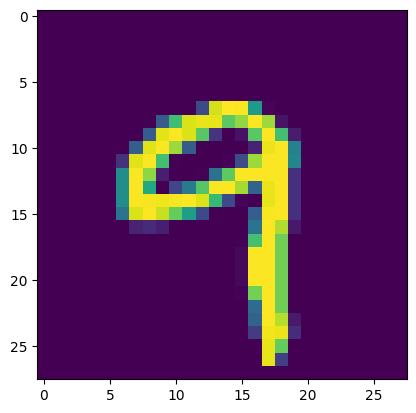

313/313 [==============================] - 1s 3ms/step


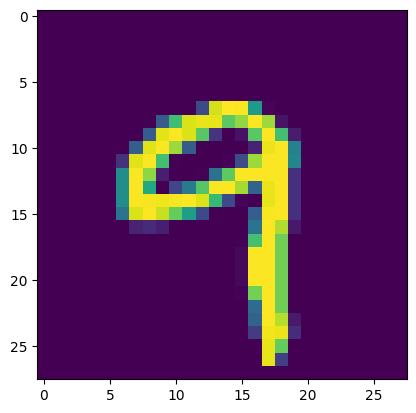

In [10]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print("Loss%.3f" %test_loss)
print("Accuracy%.3f" %test_acc)

n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

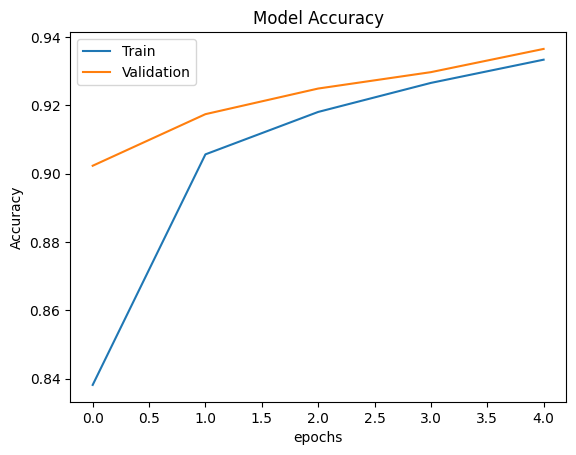

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

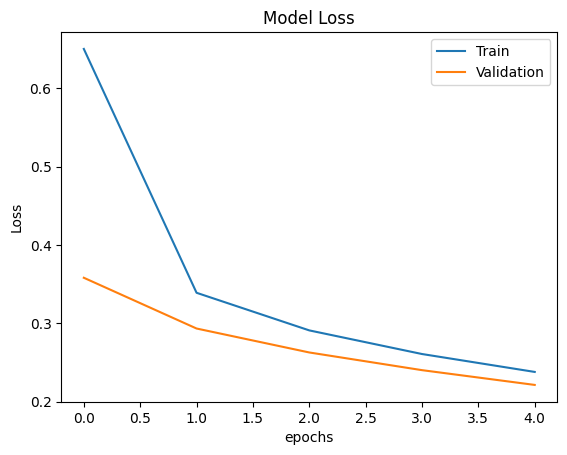

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()